In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
## csv of s&p 500 data from yahoo finance
filepath = "../Input/^GSPC.csv"

# Load spreadsheet
xl = pd.ExcelFile("../Input/government_shutdown_stats.xlsx")

# Load a sheet into a DataFrame by name:
shutdown_df = xl.parse(xl.sheet_names[0])

In [3]:
shutdown_df

,shutdown_number,from_date,to_date,length_in_days,pres_party_in_power,president,senate_party_in_power,senate_seats,house_party_in_power,house_seats
0,1,1976-09-30,1976-10-11,12,R,Ford,D,62 - 38,D,291 - 144
1,2,1977-09-30,1977-10-13,14,D,Carter,D,59 - 41,D,292 - 143
2,3,1977-10-31,1977-11-09,10,D,Carter,D,59 - 41,D,292 - 143
3,4,1977-11-30,1977-12-09,10,D,Carter,D,59 - 41,D,292 - 143
4,5,1978-09-30,1978-10-18,19,D,Carter,D,59 - 41,D,292 - 143
5,6,1979-09-30,1979-10-12,13,D,Carter,D,58 - 42,D,277 - 158
6,7,1981-11-20,1981-11-23,4,R,Reagan,R,53 - 47,D,244 - 191
7,8,1982-09-30,1982-10-02,3,R,Reagan,R,53 - 47,D,244 - 191
8,9,1982-12-17,1982-12-21,5,R,Reagan,R,53 - 47,D,244 - 191
9,10,1983-11-10,1983-11-14,5,R,Reagan,R,55 - 45,D,271 - 164


In [4]:
## read stock csv
stock_prices_unclean = pd.read_csv(filepath)

In [5]:
# ## make the index the date to help with cleaning
stock_prices_unclean = stock_prices_unclean.set_index(['Date'])

In [6]:
## loops through all of csv, only keeping date ranges we need
stock_prices_clean = pd.DataFrame()
obs_count_list = []
for shutdown in range(len(shutdown_df)):
    try: 
        from_date = stock_prices_unclean.index.get_loc(shutdown_df["from_date"][shutdown])
    except KeyError: 
        from_date = stock_prices_unclean.index.get_loc(str((pd.to_datetime(shutdown_df["from_date"][shutdown]) + datetime.timedelta(days=2)).date()))

    try: 
        to_date = stock_prices_unclean.index.get_loc(shutdown_df["to_date"][shutdown])
    except KeyError: 
        to_date = stock_prices_unclean.index.get_loc(str((pd.to_datetime(shutdown_df["to_date"][shutdown]) + datetime.timedelta(days=2)).date()))
        
    obs_count_list.append(len(stock_prices_unclean.iloc[from_date-3:to_date+3]))
    stock_prices_clean = stock_prices_clean.append(stock_prices_unclean.iloc[from_date-3:to_date+3])


In [7]:
## add shutdown number to the table
stock_prices_clean["Shutdown Number"] = 0
shutdown = 1
beg = 0
for x in obs_count_list:
    stock_prices_clean["Shutdown Number"].iloc[beg:(beg+x)] = shutdown
    shutdown += 1
    beg = (beg + x)

C:\Users\Amrit\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
stock_prices_clean

,Open,High,Low,Close,Adj Close,Volume,Shutdown Number
Date,,,,,,,
1976-09-27,106.800003,107.699997,106.349998,107.269997,107.269997,17430000,1
1976-09-28,107.269997,107.540001,105.610001,105.919998,105.919998,20440000,1
1976-09-29,105.919998,106.449997,104.830002,105.370003,105.370003,18090000,1
1976-09-30,105.370003,105.839996,104.570000,105.239998,105.239998,14700000,1
1976-10-01,105.239998,105.750000,103.599998,104.169998,104.169998,20620000,1
1976-10-04,104.169998,104.620003,103.419998,104.029999,104.029999,12630000,1
1976-10-05,104.029999,104.250000,102.510002,103.230003,103.230003,19200000,1
1976-10-06,103.230003,103.720001,102.050003,102.970001,102.970001,20870000,1
1976-10-07,102.970001,103.900002,102.160004,103.540001,103.540001,19830000,1


In [9]:
grouped_shutdown_prices = stock_prices_clean.groupby("Shutdown Number")

In [10]:
## coefficient of variation
co_var = grouped_shutdown_prices.std()/grouped_shutdown_prices.mean()
presidents = shutdown_df["president"]


In [11]:
co_var

,Open,High,Low,Close,Adj Close,Volume
Shutdown Number,,,,,,
1,0.018686,0.017692,0.018546,0.017659,0.017659,0.153532
2,0.010474,0.010950,0.011535,0.011644,0.011644,0.163228
3,0.012549,0.015235,0.014305,0.015883,0.015883,0.250734
4,0.014020,0.012541,0.012530,0.012635,0.012635,0.100198
5,0.015586,0.017019,0.018557,0.019220,0.019220,0.235481
6,0.023798,0.024481,0.027744,0.026246,0.026246,0.336758
7,0.009349,0.011240,0.010860,0.011603,0.011603,0.102225
8,0.008951,0.011687,0.009509,0.013946,0.013946,0.213329
9,0.012487,0.014714,0.011418,0.012083,0.012083,0.151083


In [12]:
shutdown_df['length_in_days'][0:20]

0     12
1     14
2     10
3     10
4     19
5     13
6      4
7      3
8      5
9      5
10     4
11     3
12     3
13     3
14     5
15     7
16    33
17    17
18     3
19     1
Name: length_in_days, dtype: int64

In [13]:
## loops through all of csv, only keeping date ranges we need
stock_prices_clean_delta = pd.DataFrame()
obs_count_list = []
for shutdown in range(len(shutdown_df)):
    try: 
        from_date = stock_prices_unclean.index.get_loc(shutdown_df["from_date"][shutdown])
    except KeyError: 
        from_date = stock_prices_unclean.index.get_loc(str((pd.to_datetime(shutdown_df["from_date"][shutdown]) + datetime.timedelta(days=2)).date()))

    try: 
        to_date = stock_prices_unclean.index.get_loc(shutdown_df["to_date"][shutdown])
    except KeyError: 
        to_date = stock_prices_unclean.index.get_loc(str((pd.to_datetime(shutdown_df["to_date"][shutdown]) + datetime.timedelta(days=2)).date()))
        
    stock_prices_clean_delta = stock_prices_clean_delta.append(stock_prices_unclean.iloc[from_date-3])
    stock_prices_clean_delta = stock_prices_clean_delta.append(stock_prices_unclean.iloc[to_date+3])

In [14]:
stock_prices_clean_delta

,Adj Close,Close,High,Low,Open,Volume
1976-09-27,107.269997,107.269997,107.699997,106.349998,106.800003,1.743000e+07
1976-10-14,100.849998,100.849998,102.139999,100.279999,102.120003,1.861000e+07
1977-09-27,95.239998,95.239998,96.010002,94.760002,95.379997,1.908000e+07
1977-10-18,93.459999,93.459999,94.190002,93.010002,93.470001,2.013000e+07
1977-10-26,92.099998,92.099998,92.459999,90.440002,91.000000,2.486000e+07
1977-11-14,95.320000,95.320000,96.379997,94.910004,95.980003,2.322000e+07
1977-11-25,96.690002,96.690002,97.110001,95.860001,96.489998,1.791000e+07
1977-12-14,94.029999,94.029999,94.260002,92.940002,93.559998,2.211000e+07
1978-09-27,101.660004,101.660004,103.440002,101.330002,102.620003,2.837000e+07
1978-10-23,98.180000,98.180000,98.839996,96.629997,97.949997,3.609000e+07


In [15]:
stock_prices_clean_delta['Open'][0]

106.800003

In [28]:
merging_list = []
count = 0
for x in range(20):
    merging_list.append((stock_prices_clean_delta['Close'][count+1]-stock_prices_clean_delta['Open'][count])*100/stock_prices_clean_delta['Open'][count])
    count = count + 2

In [29]:
merging_list

[-5.571165573843667,
 -2.0129985955021645,
 4.74725274725274,
 -2.54948600993856,
 -4.326644777042143,
 -5.974900017960161,
 4.033597871483663,
 4.443726078494981,
 1.5572490336006461,
 2.2842057909642497,
 -2.7706116941529166,
 -2.9048908700632765,
 1.5964652412285252,
 1.395600550017743,
 -4.734236014896565,
 2.5583298916831945,
 -0.8146292011397778,
 3.5784063780042574,
 1.9483017962301532,
 3.206765122497407]

In [30]:
final_test = co_var

In [31]:
final_test["Percent Change"] = merging_list

In [32]:
final_test.head()

,Open,High,Low,Close,Adj Close,Volume,Percent Change,Length
Shutdown Number,,,,,,,,
1,0.018686,0.017692,0.018546,0.017659,0.017659,0.153532,-5.571166,12
2,0.010474,0.010950,0.011535,0.011644,0.011644,0.163228,-2.012999,14
3,0.012549,0.015235,0.014305,0.015883,0.015883,0.250734,4.747253,10
4,0.014020,0.012541,0.012530,0.012635,0.012635,0.100198,-2.549486,10
5,0.015586,0.017019,0.018557,0.019220,0.019220,0.235481,-4.326645,19


In [33]:
list(shutdown_df['length_in_days'])

[12, 14, 10, 10, 19, 13, 4, 3, 5, 5, 4, 3, 3, 3, 5, 7, 33, 17, 3, 1]

In [34]:
final_test["Length"] = list(shutdown_df['length_in_days'])

In [35]:
final_test

,Open,High,Low,Close,Adj Close,Volume,Percent Change,Length
Shutdown Number,,,,,,,,
1,0.018686,0.017692,0.018546,0.017659,0.017659,0.153532,-5.571166,12
2,0.010474,0.010950,0.011535,0.011644,0.011644,0.163228,-2.012999,14
3,0.012549,0.015235,0.014305,0.015883,0.015883,0.250734,4.747253,10
4,0.014020,0.012541,0.012530,0.012635,0.012635,0.100198,-2.549486,10
5,0.015586,0.017019,0.018557,0.019220,0.019220,0.235481,-4.326645,19
6,0.023798,0.024481,0.027744,0.026246,0.026246,0.336758,-5.974900,13
7,0.009349,0.011240,0.010860,0.011603,0.011603,0.102225,4.033598,4
8,0.008951,0.011687,0.009509,0.013946,0.013946,0.213329,4.443726,3
9,0.012487,0.014714,0.011418,0.012083,0.012083,0.151083,1.557249,5


In [36]:
colors = []
for x in shutdown_df["pres_party_in_power"]:
    if x == "R":
        colors.append("r")
    elif x == "D":
        colors.append("b")

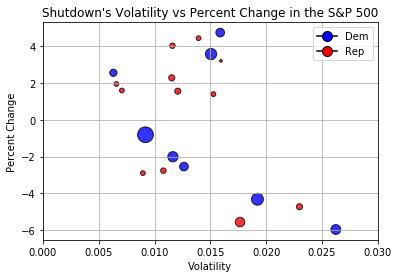

In [53]:
plt.scatter(final_test['Close'],final_test['Percent Change'],
            s=final_test['Length']*7.5 ,c=colors, alpha=.8 , edgecolors='black' )
plt.xlabel('Volatility')
plt.ylabel('Percent Change')
plt.title('Shutdown\'s Volatility vs Percent Change in the S&P 500')
plt.xlim(0, .03)

legend_elements = [Line2D([0], [0], marker='o', color='k', label='Dem',
                          markerfacecolor='b', markersize=10),
                  Line2D([0], [0], marker='o', color='k', label='Rep',
                          markerfacecolor='r', markersize=10)]
plt.legend(handles = legend_elements)
plt.grid()